En el siguiente archivo, se muestra el ciclo de vida de un proyecto de ciencia de datos aplicado al conjunto de datos "Adult income dataset" del repositorio UCI. Con el propóstico de predecir los ingresos de los adultos, basado en factore como el nivel de educación, el genéro, la ocupación y otros.

**Importación de librerias**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
from sklearn import model_selection, preprocessing, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras
from tensorflow.keras import layers


%matplotlib inline

In [2]:
! pip install -U neptune-sklearn scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! pip install -U neptune-tensorflow-keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
! pip install neptune

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Carga de conjunto de datos**

In [5]:
data_read = pd.read_csv('adult.csv')

In [6]:
data, test_data = train_test_split(data_read,random_state=0,test_size=0.2)

# Análisis exploratorio de datos

## Análisis general de las variables

In [7]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
22729,20,?,298155,Some-college,10,Never-married,?,Own-child,Black,Female,0,0,40,United-States,<=50K
8650,42,Private,180985,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,52,United-States,<=50K
26605,35,State-gov,483530,Some-college,10,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
15864,39,?,142804,HS-grad,9,Divorced,?,Unmarried,White,Female,0,0,16,United-States,<=50K
2516,24,Private,354351,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [8]:
data.shape

(39073, 15)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39073 entries, 22729 to 2732
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              39073 non-null  int64 
 1   workclass        39073 non-null  object
 2   fnlwgt           39073 non-null  int64 
 3   education        39073 non-null  object
 4   educational-num  39073 non-null  int64 
 5   marital-status   39073 non-null  object
 6   occupation       39073 non-null  object
 7   relationship     39073 non-null  object
 8   race             39073 non-null  object
 9   gender           39073 non-null  object
 10  capital-gain     39073 non-null  int64 
 11  capital-loss     39073 non-null  int64 
 12  hours-per-week   39073 non-null  int64 
 13  native-country   39073 non-null  object
 14  income           39073 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.8+ MB


**Descripción de variables**

- `age`: La edad de los individuos en años
- `capital_gain`: Ganancia de capital del año anterior
- `capital_loss`: Pérdida de capital del año aterior
- `education`: Nivel de educación más alto alcanzado por el individuo
- `education-num`: Forma númerica de representa el nivel de educación más alto alcanzado
- `fnlwgt`: Una estimación del número de individuos de la población con los mismos datos demográficos que este individuo
- `hours_per_week`: Horas trabajadas a la semana
- `marital_status`: Estado civil del individuo
- `native_country`: País de origen del individuo
- `occupation`: Ocupación del individuo
- `race`: Raza del individuo
- `relationship`: Situación sentimental del individuo
- `gender`: Genero del individo
- `workclass`: La industria/sector en el que trabaja el individuo.la industria/

**Clasificación de variables**

El conjunto de datos tiene 15 variables las cuales se clasifican de la siguiente manera:


*   age -> numérica discreta
*   workclass -> cualitativa nominal
*   fnlwgt -> numérica
*   education -> cualitativa ordinal
*   marital-status -> cualitativa nominal
*   occupation -> cualitativa nominal
*   relationship -> cualitativa nominal
*   race -> cualitativa nominal
*   sex -> cualitativa nominal
*   capital-gain ->
*   capital-loss ->
*   hours-per-week ->
*   native-country ->
*   income ->









Cada una de las variables anteriores tiene los siguientes valores unicos o rangos:

In [10]:
column_list = data.columns.values.tolist()
for column_name in column_list:
    print(column_name.upper())
    if data[column_name].dtype == 'object':
      unique_values = data[column_name].unique()   
      print(' *** Número de valores únicos: ', len(unique_values))
      print(' ***', end='')
      print(*unique_values, sep=", ")
    else:
      print(' ***', min(data[column_name]), '-', max(data[column_name]))

AGE
 *** 17 - 90
WORKCLASS
 *** Número de valores únicos:  9
 ***?, Private, State-gov, Self-emp-inc, Local-gov, Self-emp-not-inc, Federal-gov, Never-worked, Without-pay
FNLWGT
 *** 12285 - 1490400
EDUCATION
 *** Número de valores únicos:  16
 ***Some-college, Assoc-voc, HS-grad, Bachelors, Assoc-acdm, 7th-8th, Prof-school, 1st-4th, 10th, Masters, 11th, 5th-6th, 9th, 12th, Doctorate, Preschool
EDUCATIONAL-NUM
 *** 1 - 16
MARITAL-STATUS
 *** Número de valores únicos:  7
 ***Never-married, Married-civ-spouse, Divorced, Widowed, Separated, Married-spouse-absent, Married-AF-spouse
OCCUPATION
 *** Número de valores únicos:  15
 ***?, Craft-repair, Tech-support, Prof-specialty, Other-service, Exec-managerial, Adm-clerical, Priv-house-serv, Sales, Handlers-cleaners, Machine-op-inspct, Farming-fishing, Protective-serv, Transport-moving, Armed-Forces
RELATIONSHIP
 *** Número de valores únicos:  6
 ***Own-child, Husband, Unmarried, Not-in-family, Wife, Other-relative
RACE
 *** Número de valores 

* Las categorías en la variable marital-status parecen repetirse, por lo que en la sección de preprocesamiento se 

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,39073.0,38.671999,13.723553,17.0,28.0,37.0,48.0,90.0
fnlwgt,39073.0,189693.363653,105363.170247,12285.0,117583.0,178255.0,237811.0,1490400.0
educational-num,39073.0,10.070253,2.572078,1.0,9.0,10.0,12.0,16.0
capital-gain,39073.0,1069.573158,7409.322913,0.0,0.0,0.0,0.0,99999.0
capital-loss,39073.0,87.204131,402.428102,0.0,0.0,0.0,0.0,4356.0
hours-per-week,39073.0,40.406470,12.424401,1.0,40.0,40.0,45.0,99.0


In [12]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Las variables capital-loss, hours-per-week, native-country e income tienen valores nulos

### Análisis de cada variable

#### income (Variable objetivo)

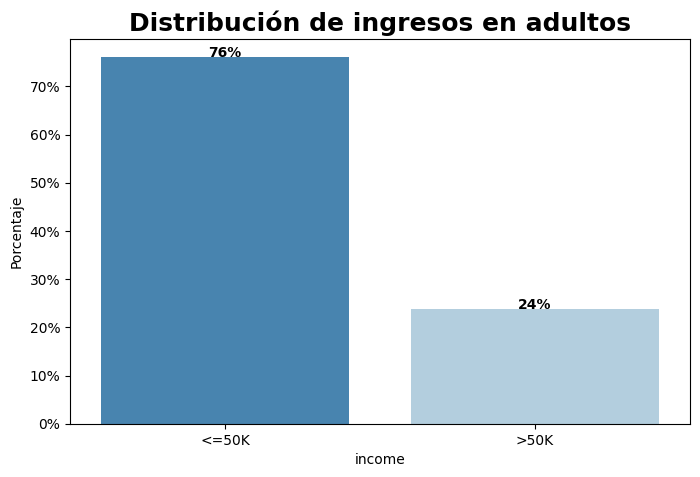

In [13]:
plt.figure(figsize = (8,5))
plt.title('Distribución de ingresos en adultos', fontsize=18, fontweight='bold')
eda_percentage = data['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Porcentaje')

ax = sns.barplot(x = 'income', y = 'Porcentaje', data = eda_percentage.head(10), palette='Blues_r')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1), ha='center', fontweight='bold')

Se puede observar que de acuerdo a los datos, la mayoría de los adultos (76%), tiene un ingreso anual menor a los 50,000

#### age 

In [14]:
data['age'].describe()

count    39073.000000
mean        38.671999
std         13.723553
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

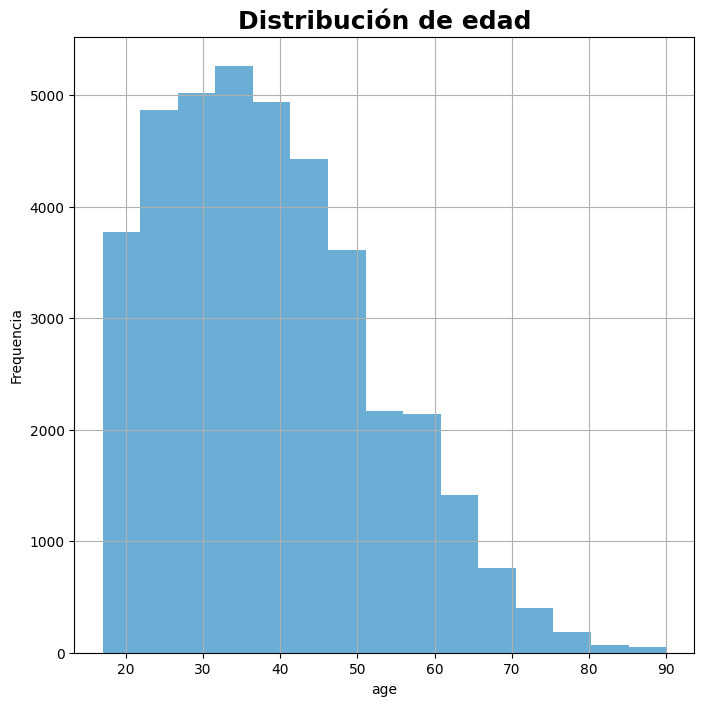

In [15]:
plt.figure(figsize=(8, 8))
color = sns.color_palette('Blues', 1)
data['age'].hist(color=color, bins=15)
plt.title('Distribución de edad', fontsize=18, fontweight='bold')
plt.xlabel('age')
plt.ylabel('Frequencia')
plt.show()

La mayoría de los adultos están entre los 30 y 40 años.

<Figure size 800x600 with 0 Axes>

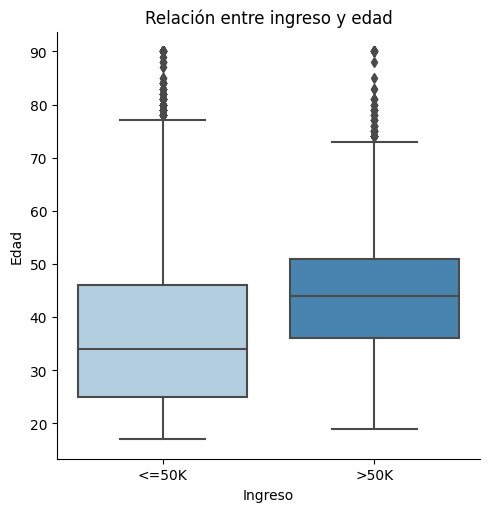

In [16]:
#Relación entre ingreso y edad

plt.figure(figsize=(8, 6))
sns.catplot(data=data, x='income', y='age', kind='box', palette='Blues', aspect=1)
plt.title('Relación entre ingreso y edad')
plt.xlabel('Ingreso')
plt.ylabel('Edad')
plt.show()

In [17]:
# Función para separar las edades por grupos
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    else:
        return "Más de 60"

data['age_group'] = data['age'].apply(age_group).astype('category')

Text(0.5, 1.0, 'Ingreso de adultos de diferentes grupos de edad')

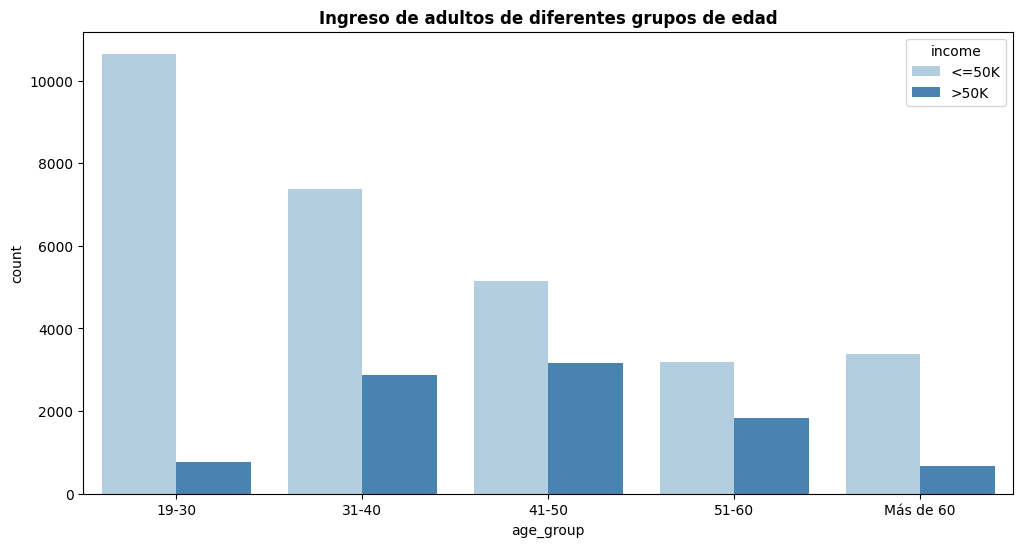

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='age_group', hue ='income', palette='Blues')
plt.title('Ingreso de adultos de diferentes grupos de edad', fontsize=12, fontweight='bold')

Se observa que en todos los grupos de edad la mayoría de las personas tienen un ingreso menor o igual a los \$50,000 lo cual tiene sentido, ya que como vimos en el histograma **"Distribución de ingresos en adultos"**, la mayoría de las personas tienen ese ingreso. Sin embargo se observa como en los grupos de edad de entre 30-50 hay más cantidad de personas con un ingreso mayor a los \$50,000 en comparación con los otros grupos. 



#### workclass

In [19]:
data['workclass'].describe()

count       39073
unique          9
top       Private
freq        27124
Name: workclass, dtype: object

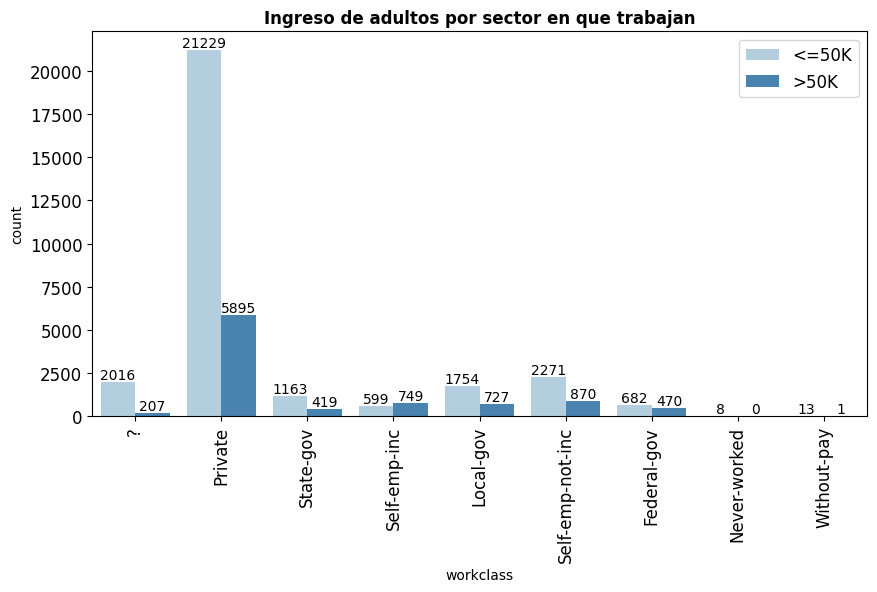

In [20]:
plt.figure(figsize=(10,5))

ax = sns.countplot(data = data, x = 'workclass', hue = 'income', palette='Blues')
plt.title('Ingreso de adultos por sector en que trabajan', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12,rotation = 90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [21]:
from IPython.display import display, Markdown

table_md = """
|     Grupo         | Porcentaje <=50k | Porcentaje >50k |
|:-----------------|-----------------:|---------------:|
| **Private**    |         78.20%   |       21.80%   |
| **Local-gov**       |         70.43%   |       29.57%   |
| **?**              |         90.55%   |        9.45%   |
| **Self-emp-not-inc**|         72.07%   |       27.93%   |
| **Federal-gov**    |         60.82%   |       39.18%   |
| **State-gov**      |         73.26%   |       26.74%   |
| **Self-emp-inc**   |         44.68%   |       55.32%   |
| **Without-pay**    |         90.48%   |        9.52%   |
| **Never-worked**   |        100.00%   |        0.00%   |
"""

display(Markdown(table_md))



|     Grupo         | Porcentaje <=50k | Porcentaje >50k |
|:-----------------|-----------------:|---------------:|
| **Private**    |         78.20%   |       21.80%   |
| **Local-gov**       |         70.43%   |       29.57%   |
| **?**              |         90.55%   |        9.45%   |
| **Self-emp-not-inc**|         72.07%   |       27.93%   |
| **Federal-gov**    |         60.82%   |       39.18%   |
| **State-gov**      |         73.26%   |       26.74%   |
| **Self-emp-inc**   |         44.68%   |       55.32%   |
| **Without-pay**    |         90.48%   |        9.52%   |
| **Never-worked**   |        100.00%   |        0.00%   |


* La variable workclass tiene un valor que no es descriptivo en cuanto al sector en el que trabaja la persona (?), este se trabajara más adelante en la limpieza de datos.

* Se puede observar que la mayoría de las personas trabajan en el sector privado y muy pocos son auto-empleados  o trabajan para el gobierno.

 
* En los grupos que trabajan para el gobierno federal y son auto-empleados, el porcentaje de personas que ganan más de 50,000 es mayor que en los otros grupos, siendo este porcentaje 39.18% y 55.32% respectivamente. 


#### gender

In [22]:
data['gender'].describe()

count     39073
unique        2
top        Male
freq      26165
Name: gender, dtype: object

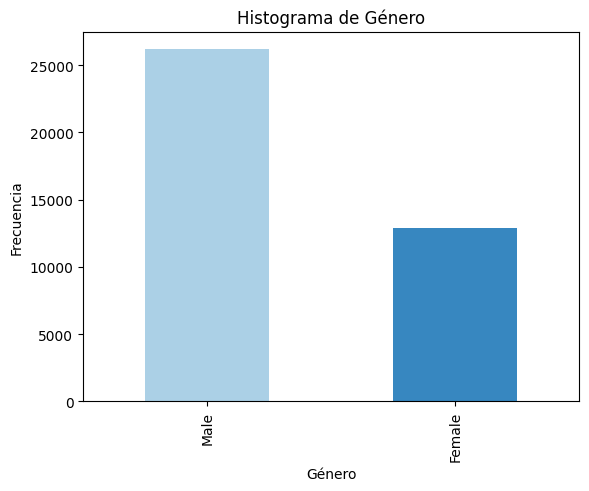

In [23]:
value_counts = data['gender'].value_counts()
fig, ax = plt.subplots()
colors = sns.color_palette('Blues', 2)
value_counts.plot.bar(color=colors, ax=ax)

ax.set_title('Histograma de Género')
ax.set_xlabel('Género')
ax.set_ylabel('Frecuencia')
plt.show()

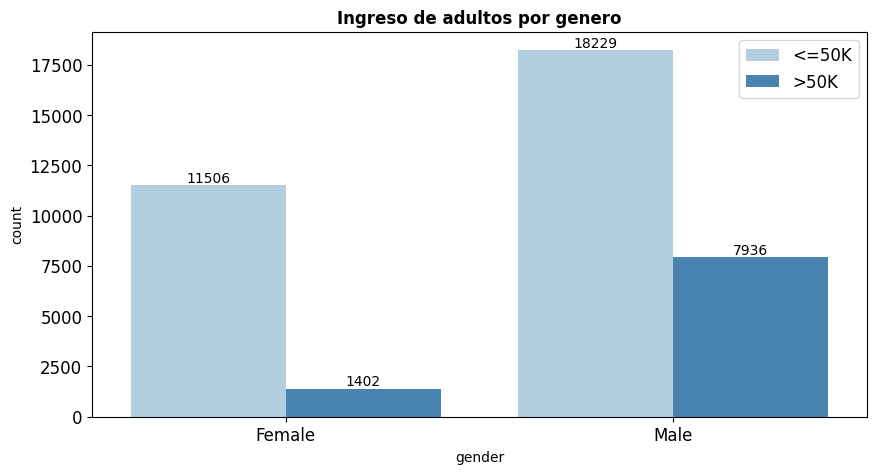

In [24]:
plt.figure(figsize=(10,5))

ax = sns.countplot(data = data, x = 'gender', hue = 'income', palette = 'Blues')
plt.title('Ingreso de adultos por genero', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

*   Menos del 13% de las mujeres genera ingresos superiores a \$50000, mientras que el 30% de los hombres tiene ingresos superiores a \$50000.

#### hours-per-week

<Figure size 800x600 with 0 Axes>

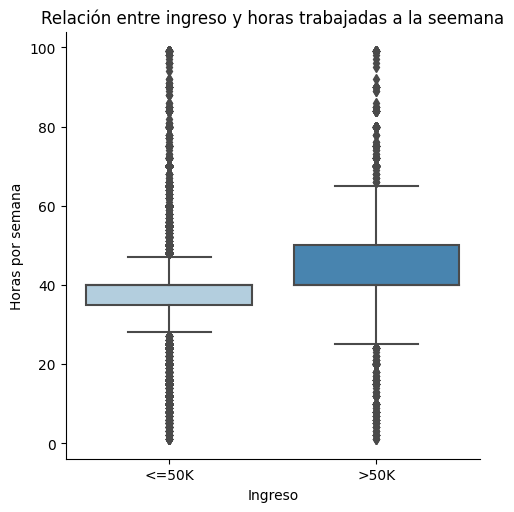

In [25]:
plt.figure(figsize=(8, 6))
sns.catplot(data=data, x='income', y='hours-per-week', kind='box', palette='Blues', aspect=1)
plt.title('Relación entre ingreso y horas trabajadas a la seemana')
plt.xlabel('Ingreso')
plt.ylabel('Horas por semana')
plt.show()

El promedio máximo de horas trabajadas a la semana es mayor para quienes ganan más de 50,000.

#### capital-gain

<Figure size 800x600 with 0 Axes>

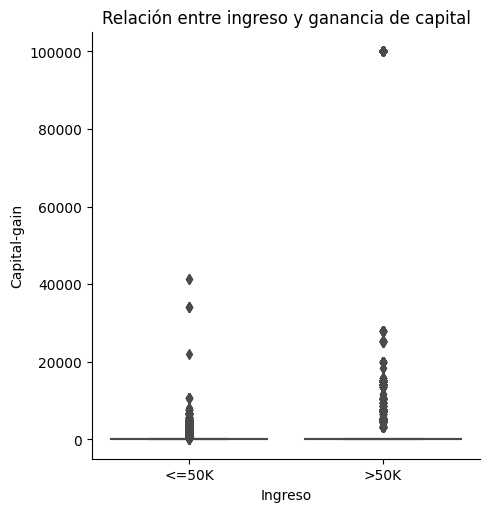

In [26]:
#Relación entre ingreso y edad

plt.figure(figsize=(8, 6))
sns.catplot(data=data, x='income', y='capital-gain', kind='box', palette='Blues', aspect=1)
plt.title('Relación entre ingreso y ganancia de capital')
plt.xlabel('Ingreso')
plt.ylabel('Capital-gain')
plt.show()

El promedio de ganancia de capital no parece cambiar dependiendo de lo que ganan las personas

#### Capital-loss 

<Figure size 800x600 with 0 Axes>

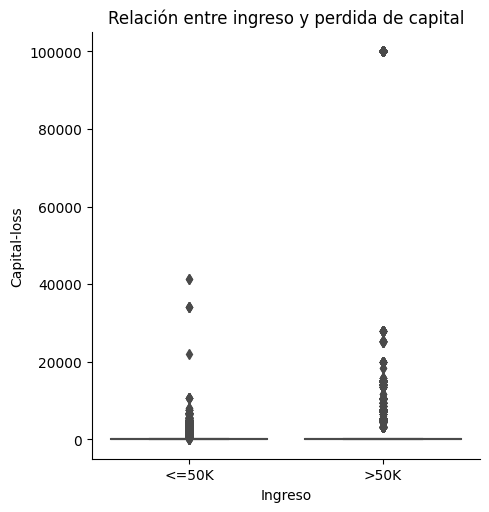

In [27]:
#Relación entre ingreso y edad

plt.figure(figsize=(8, 6))
sns.catplot(data=data, x='income', y='capital-gain', kind='box', palette='Blues', aspect=1)
plt.title('Relación entre ingreso y perdida de capital')
plt.xlabel('Ingreso')
plt.ylabel('Capital-loss')
plt.show()

El promedio de perdida de capital no parece cambiar dependiendo de lo que ganan las personas

#### occupation

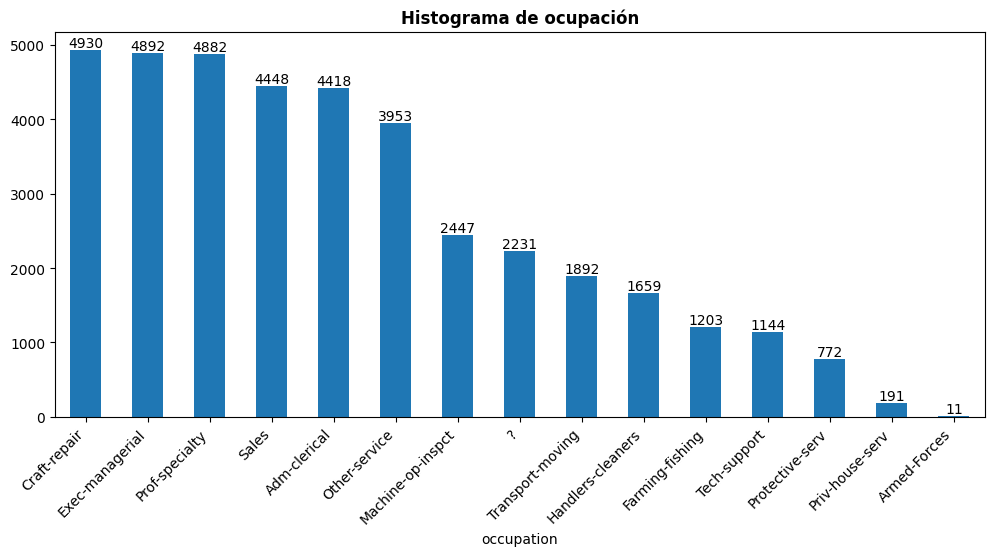

In [28]:
plt.figure(figsize=(12, 5)) 
ax = data.groupby(['occupation'])['occupation'].count().sort_values(ascending=False).plot.bar(y = 'count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Histograma de ocupación', fontsize=12, fontweight='bold')
ax.bar_label(ax.containers[0])
plt.show()

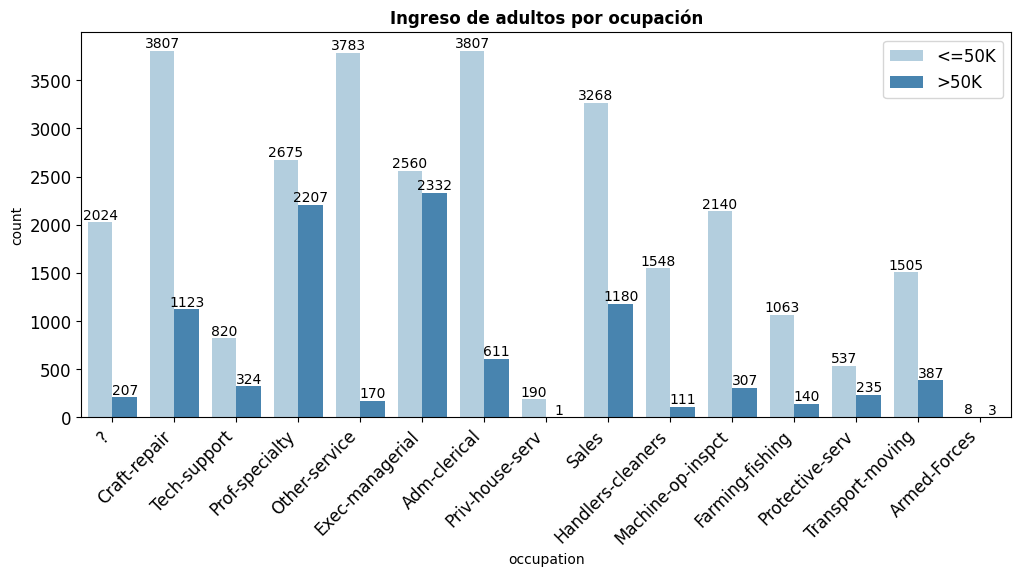

In [29]:
plt.figure(figsize=(12, 5)) 

ax = sns.countplot(data = data, x = 'occupation', hue = 'income', palette = 'Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Ingreso de adultos por ocupación', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

*   La categoría en la que hay más adultos es los que trabajan en Craft-repair (4930), mientras que muy pocos adultos trabajan en las fuerzas armadas (11).

*   En las ocupaciones de *executive manager* y *profesional specialist* existe un mayor porcentaje de personas que ganan más de $50000 que en otras ocupaciones.



#### race

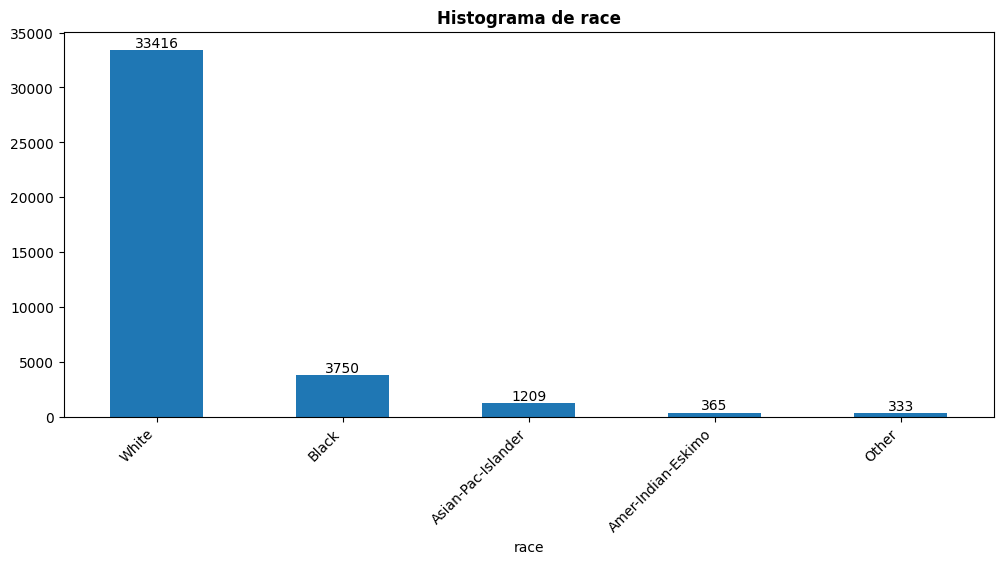

In [30]:
plt.figure(figsize=(12, 5)) 
ax = data.groupby(['race'])['race'].count().sort_values(ascending=False).plot.bar(y = 'count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Histograma de race', fontsize=12, fontweight='bold')
ax.bar_label(ax.containers[0])
plt.show()

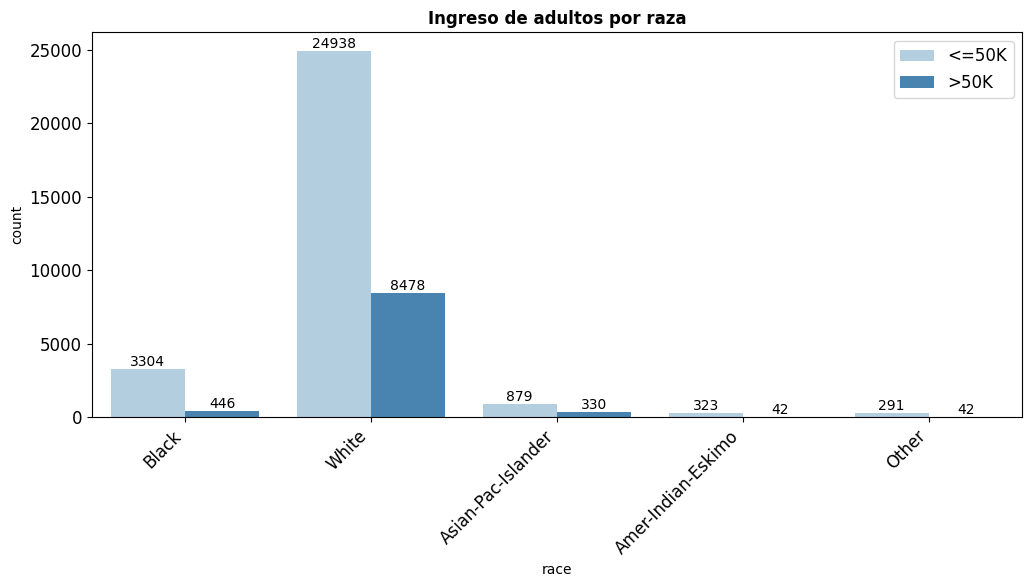

In [31]:
plt.figure(figsize=(12, 5)) 

ax = sns.countplot(data = data, x = 'race', hue = 'income', palette = 'Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Ingreso de adultos por raza', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()


* Hay un mayor porcentaje de personas blancas y Asian-Pac-Islander que ganan más de $50000 en comparación con otras razas.   



#### native-country

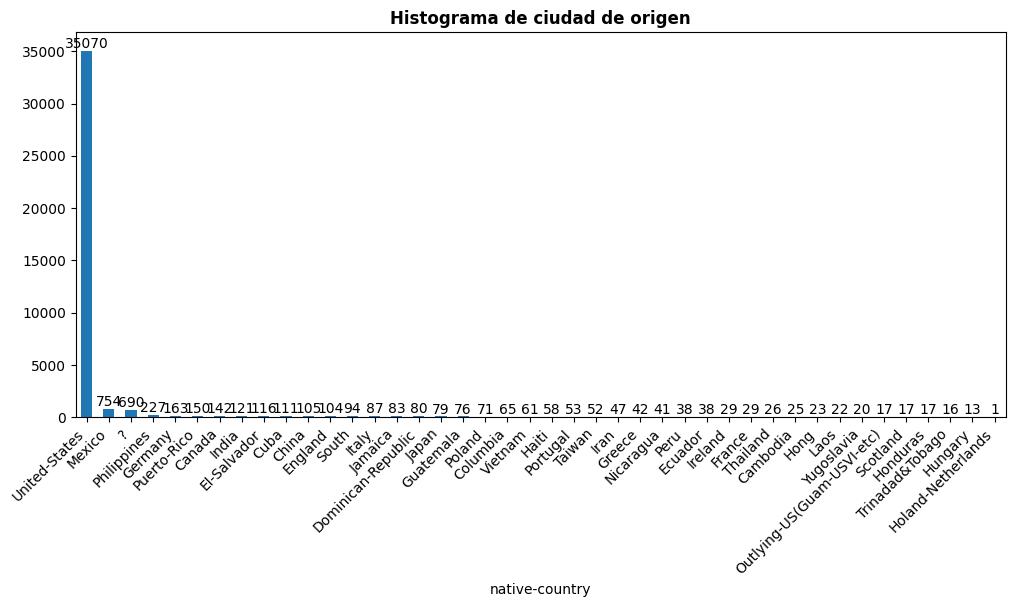

In [32]:
plt.figure(figsize=(12, 5)) 
ax = data.groupby(['native-country'])['native-country'].count().sort_values(ascending=False).plot.bar(y = 'count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Histograma de ciudad de origen', fontsize=12, fontweight='bold')
ax.bar_label(ax.containers[0])
plt.show()

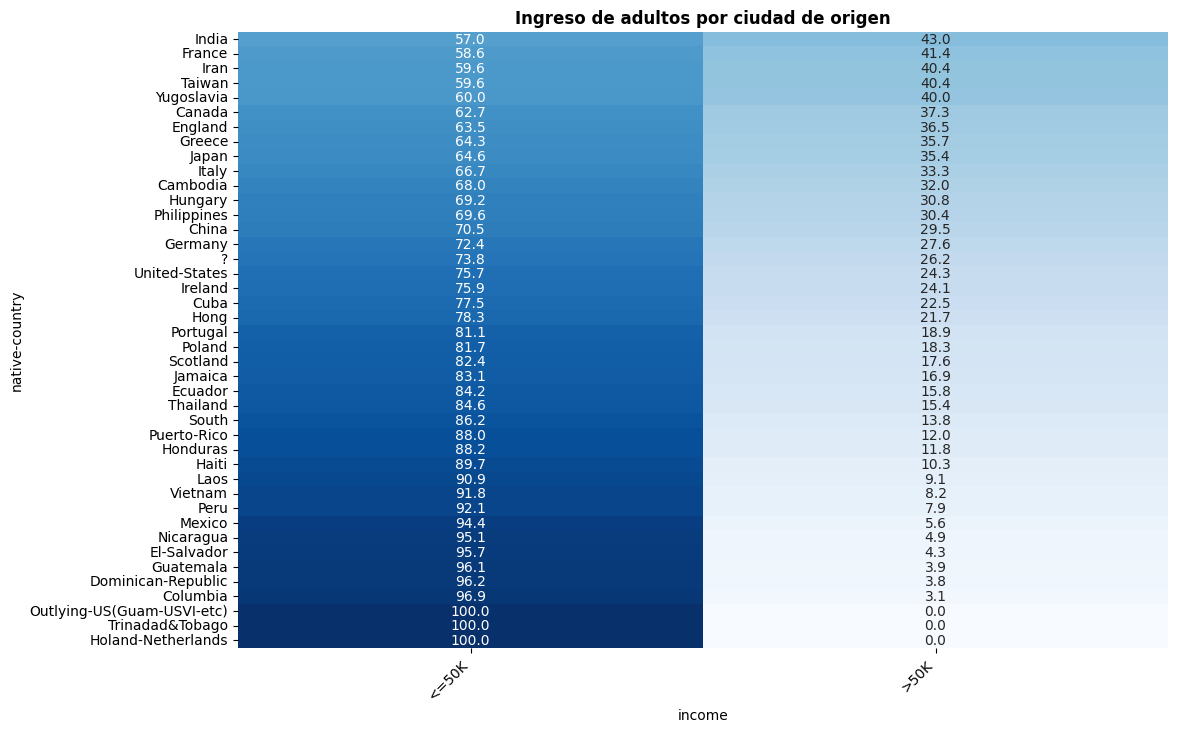

In [33]:

# Calcula los porcentajes relativos a cada fila
table = pd.crosstab(data['native-country'], data['income'], normalize='index') * 100

# Ordena las filas de mayor a menor
table = table.sort_values(by='>50K', ascending=False)

# Configura el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crea el gráfico de tabla con porcentajes relativos utilizando Seaborn
sns.heatmap(table, annot=True, cmap='Blues', fmt='.1f', cbar=False)

# Ajusta las etiquetas del eje x
plt.xticks(rotation=45, ha='right', fontsize=10)

# Ajusta las etiquetas del eje y
plt.yticks(rotation=0, fontsize=10)

# Añade un título al gráfico
plt.title('Ingreso de adultos por ciudad de origen', fontsize=12, fontweight='bold')

# Muestra el gráfico
plt.show()

* Parece que el país de origen también tiene correlación con los ingresos, ya que de las personas de lugares como los Países Bajos y Trinidad y Tobago no hay personas que ganen más de \$50,000. Por el otro lado, de las personas de lugares como India y Francia, más del 40% gana más de \$50,000.

# Preprocesamiento de datos

Conversión de las variables income y gender a numéricas

In [34]:
data['income'] = data['income'].replace({'<=50K': 0, '>50K': 1})
data['gender'] = data['gender'].replace({'Male': 0, 'Female': 1})

Mapa de correlación entre variables

<ipython-input-35-7166c51d875e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='Blues_r')


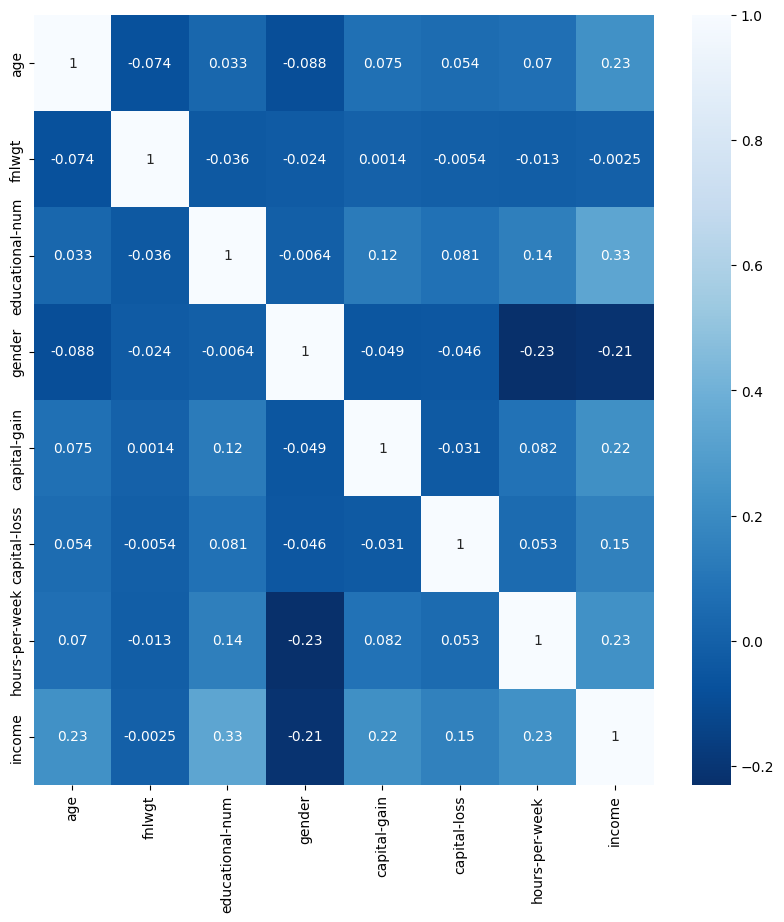

In [35]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap='Blues_r')
plt.show()

* Las 3 variables con más correlación con el ingreso son las de nivel educativo, horas por semana y edad.

Ya habiendo analizado el conjunto de datos, se decide eliminar las siguientes antes de comenzar con el preprocesamiento: 

*   education -> Debido a que existe una variable que nos provee la misma información (education-num) y al usar education-num, se evita el paso de tener que convertir esta variable a datos numéricos.




In [36]:
variables_eliminar = ['education', 'age_group']

In [37]:
data_processed = data.drop(variables_eliminar, axis=1)
test_data= test_data.drop(['education'], axis=1)
col_names = data_processed.columns

In [38]:
test_data['income'] = test_data['income'].replace({'<=50K': 0, '>50K': 1})
test_data['gender'] = test_data['gender'].replace({'Male': 0, 'Female': 1})

Reemplazar categoría desconocida en workclass (?) por nulo

In [39]:
data_processed['workclass'] = data_processed['workclass'].replace("?", np.NaN)
test_data['workclass'] = test_data['workclass'].replace("?", np.NaN)

Manejar valores nulos

In [40]:
null_cols = ['workclass','occupation','native-country']
for col in null_cols:
  data_processed[col] = data_processed.groupby("income")[col].transform(lambda x: x.fillna(x.mode()[0]))
  test_data[col] = test_data.groupby("income")[col].transform(lambda x: x.fillna(x.mode()[0]))

Eliminar registros duplicados

In [43]:
data_processed=data_processed.drop_duplicates() 
test_data=test_data.drop_duplicates() 

Normalización de datos

In [44]:
from sklearn import preprocessing

def scale(data):
  numeric_cols=list(data.select_dtypes(include=[np.number]).columns)
  numeric_cols.remove('income')
  numeric_cols.remove('gender')
  std=preprocessing.StandardScaler()
  data[numeric_cols] = std.fit_transform(data[numeric_cols])
  
  return data

In [45]:
data_preprocessed = scale(data_processed)
test_data = scale(test_data)

Juntar las categorías repetidas en variable marital-status

In [46]:
def join_categories(data):
  data['marital-status'].replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent','Never-married','Separated','Widowed'],
             ['divorced','married','married','married','not married','not married','not married'], inplace = True)
  
  return data

In [47]:
data_processed = join_categories(data_processed)
test_data = join_categories(test_data)

Convertir el resto de las variables categoricas a numéricas

In [50]:
def cat_to_num(data):
  cat_cols=data_processed.select_dtypes(include=[object]).columns.sort_values()

  for col in cat_cols:
    data[col]=data[col].astype(str)
    col_vals=data[col].unique()
    if len(col_vals)==2:
        i=0
        for label in col_vals:
            data[col].replace(label,i,inplace=True)
            i+=1
            
  data=pd.get_dummies(data
                ,columns =data.select_dtypes(include=[object]).columns 
                ,drop_first = True)
  
  return data

In [51]:
data_processed = cat_to_num(data_processed)
test_data = cat_to_num(test_data)

In [52]:
data_processed.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
22729,-1.361413,1.029359,-0.027507,1,-0.144423,-0.216799,-0.033003,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8650,0.241997,-0.082622,0.361415,0,-0.144423,-0.216799,0.932789,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26605,-0.268179,2.788626,-0.027507,1,-0.144423,-0.216799,-0.033003,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15864,0.023350,-0.444972,-0.416428,1,-0.144423,-0.216799,-1.964587,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2516,-1.069884,1.562676,1.139257,0,-0.144423,-0.216799,-0.033003,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
test_data.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
38113,-0.185172,-1.162859,1.126201,0,-0.146604,-0.218861,-0.039586,0,0,0,...,0,0,0,0,0,0,0,1,0,0
39214,1.352296,-1.428212,1.905459,0,-0.146604,-0.218861,-0.365862,1,0,0,...,0,0,0,0,0,0,0,1,0,0
44248,0.766594,0.920473,1.515830,0,0.481526,-0.218861,0.368259,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10283,1.132658,-0.055204,-2.770086,0,-0.146604,-0.218861,1.183949,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26724,-1.576215,0.368157,-1.601200,1,-0.146604,-0.218861,-1.344691,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
for column in data_processed.columns:
  if column not in test_data:
    test_data[column] = 0

data_processed = data_processed.sort_index(axis=1)
test_data = test_data.sort_index(axis=1)

# Modelos

Separación de datos

In [56]:
y=data_processed['income']
X=data_processed.drop(columns=['income'],axis=1)

X_train,X_validation,y_train,y_validation=train_test_split(X,y,random_state=0,test_size=0.12)

### Red neuronal

Se probaron varias arquitecturas de redes neuronales y diferentes hiperparámetros, la siguiente es la que obtuvo los mejores resultados entre las probadas con un F1-Score de 0.795 en los datos de validación.

Debido a que hay un desequlibro de clases la métrica que se utilizó para evaluar el desempeño de los modelos es F1-Score.

In [58]:
from tensorflow import keras
model = keras.Sequential([
    layers.Dense(80, activation='relu', input_dim=80),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.AUC(), keras.metrics.FalsePositives(), keras.metrics.FalseNegatives()])

model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_validation, y_validation))

results = model.evaluate(X_validation, y_validation)

f1 = 2 * (results[3] * results[4]) / (results[3] + results[4])

print("F1-score:", f1)

Epoch 1/10
1074/1074 [==============================] - 12s 9ms/step - loss: 0.3339 - accuracy: 0.8424 - precision: 0.7034 - recall: 0.5889 - auc: 0.8962 - false_positives: 2039.0000 - false_negatives: 3375.0000 - val_loss: 0.2995 - val_accuracy: 0.8651 - val_precision: 0.7712 - val_recall: 0.6231 - val_auc: 0.9180 - val_false_positives: 208.0000 - val_false_negatives: 424.0000
Epoch 2/10
1074/1074 [==============================] - 7s 7ms/step - loss: 0.3092 - accuracy: 0.8554 - precision: 0.7343 - recall: 0.6190 - auc: 0.9119 - false_positives: 1839.0000 - false_negatives: 3128.0000 - val_loss: 0.2974 - val_accuracy: 0.8636 - val_precision: 0.7346 - val_recall: 0.6764 - val_auc: 0.9189 - val_false_positives: 275.0000 - val_false_negatives: 364.0000
Epoch 3/10
1074/1074 [==============================] - 9s 8ms/step - loss: 0.3040 - accuracy: 0.8585 - precision: 0.7417 - recall: 0.6257 - auc: 0.9147 - false_positives: 1789.0000 - false_negatives: 3073.0000 - val_loss: 0.2927 - val_acc

In [73]:
results = model.evaluate(X_train, y_train)

f1 = 2 * (results[3] * results[4]) / (results[3] + results[4])

print("F1-score:", f1)

1074/1074 [==============================] - 5s 5ms/step - loss: 0.2501 - accuracy: 0.8840 - precision: 0.8088 - recall: 0.6739 - auc: 0.9446 - false_positives: 1308.0000 - false_negatives: 2677.0000
F1-score: 0.7866196552066351


147/147 [==============================] - 0s 1ms/step


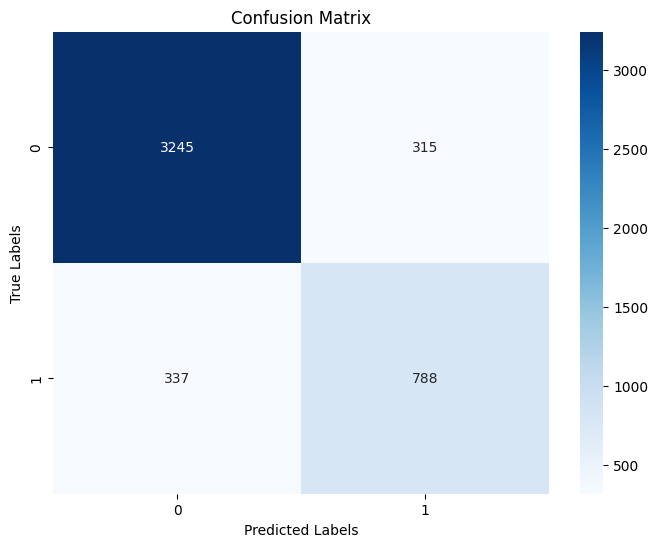

In [59]:
y_pred = model.predict(X_validation)
threshold = 0.5
y_pred_binary = np.where(y_pred > threshold, 1, 0)
cm = confusion_matrix(y_validation, y_pred_binary)
# Crear un mapa de calor con la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Agregar etiquetas, título y ejes
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Mostrar el mapa de calor
plt.show()

A continuación se utiliza Neptune para visualizar los resultados del entrenamiento del modelo.

In [60]:
import neptune

run = neptune.init_run(
    project="aralimata/AdultIncomeNN",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIzMWU1MGY3NC1iN2NiLTQzNzAtYTFhMC1lMDI5OWU0NmVhNWQifQ==",
) 

<ipython-input-60-b8947e4670dc>:3: NeptuneWarning: To avoid unintended consumption of logging hours during interactive sessions, the following monitoring options are disabled unless set to 'True' when initializing the run: 'capture_stdout', 'capture_stderr', and 'capture_hardware_metrics'.
  run = neptune.init_run(


https://app.neptune.ai/aralimata/AdultIncomeNN/e/ADNN-15


In [61]:
from neptune.integrations.tensorflow_keras import NeptuneCallback

neptune_cbk = NeptuneCallback(run=run)

model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_validation, y_validation), callbacks=[neptune_cbk])

Epoch 1/10
1074/1074 [==============================] - 4s 4ms/step - loss: 0.2814 - accuracy: 0.8695 - precision: 0.7674 - recall: 0.6514 - auc: 0.9276 - false_positives: 1621.0000 - false_negatives: 2862.0000 - val_loss: 0.2976 - val_accuracy: 0.8649 - val_precision: 0.7257 - val_recall: 0.7031 - val_auc: 0.9196 - val_false_positives: 299.0000 - val_false_negatives: 334.0000
Epoch 2/10
1074/1074 [==============================] - 4s 4ms/step - loss: 0.2784 - accuracy: 0.8719 - precision: 0.7709 - recall: 0.6603 - auc: 0.9293 - false_positives: 1611.0000 - false_negatives: 2789.0000 - val_loss: 0.2988 - val_accuracy: 0.8628 - val_precision: 0.7322 - val_recall: 0.6756 - val_auc: 0.9172 - val_false_positives: 278.0000 - val_false_negatives: 365.0000
Epoch 3/10
1074/1074 [==============================] - 8s 7ms/step - loss: 0.2767 - accuracy: 0.8711 - precision: 0.7689 - recall: 0.6586 - auc: 0.9302 - false_positives: 1625.0000 - false_negatives: 2803.0000 - val_loss: 0.2998 - val_accu

In [62]:
run.stop()

Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 15 operations to synchronize with Neptune. Do not kill this process.
All 15 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/aralimata/AdultIncomeNN/e/ADNN-15/metadata


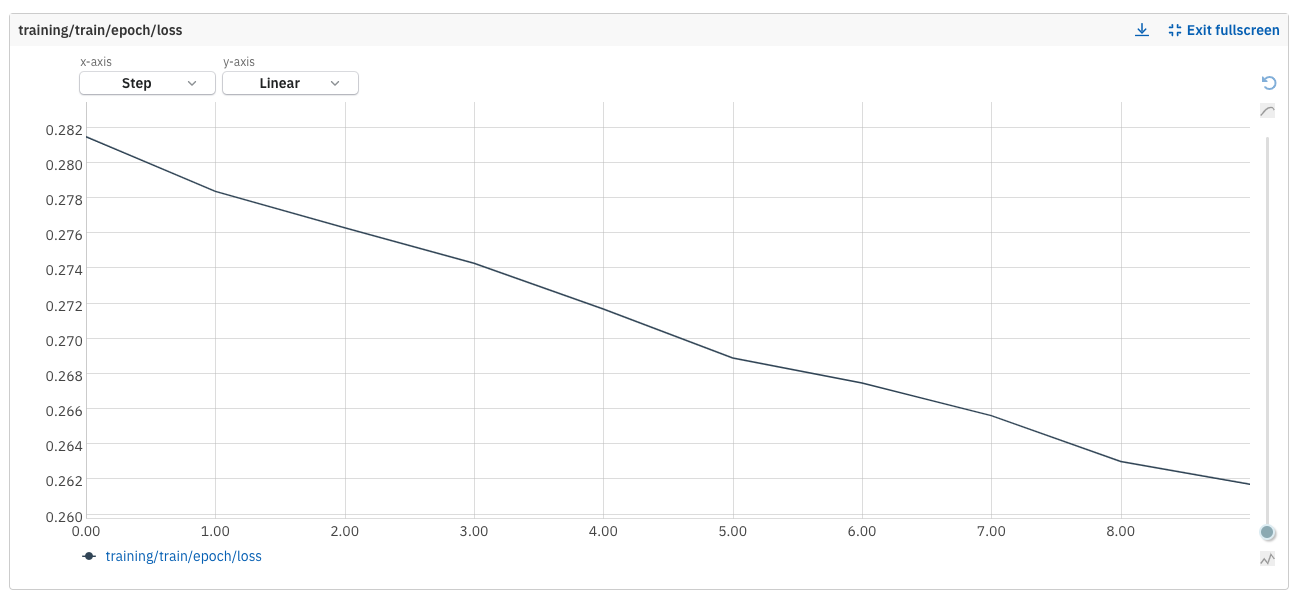

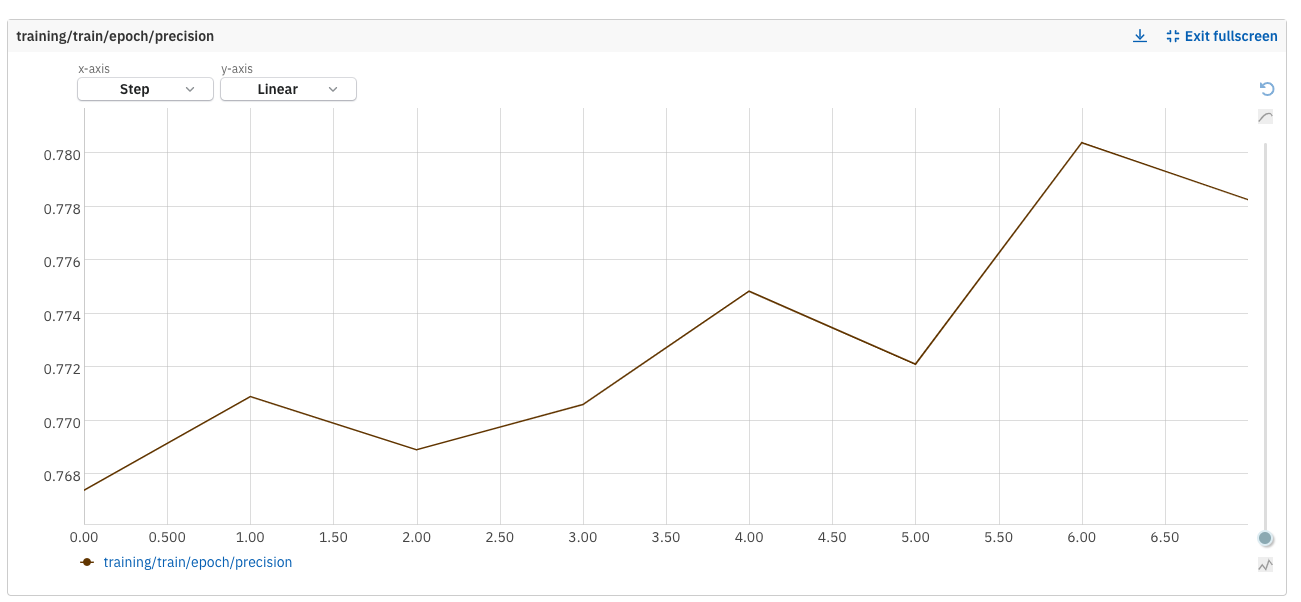

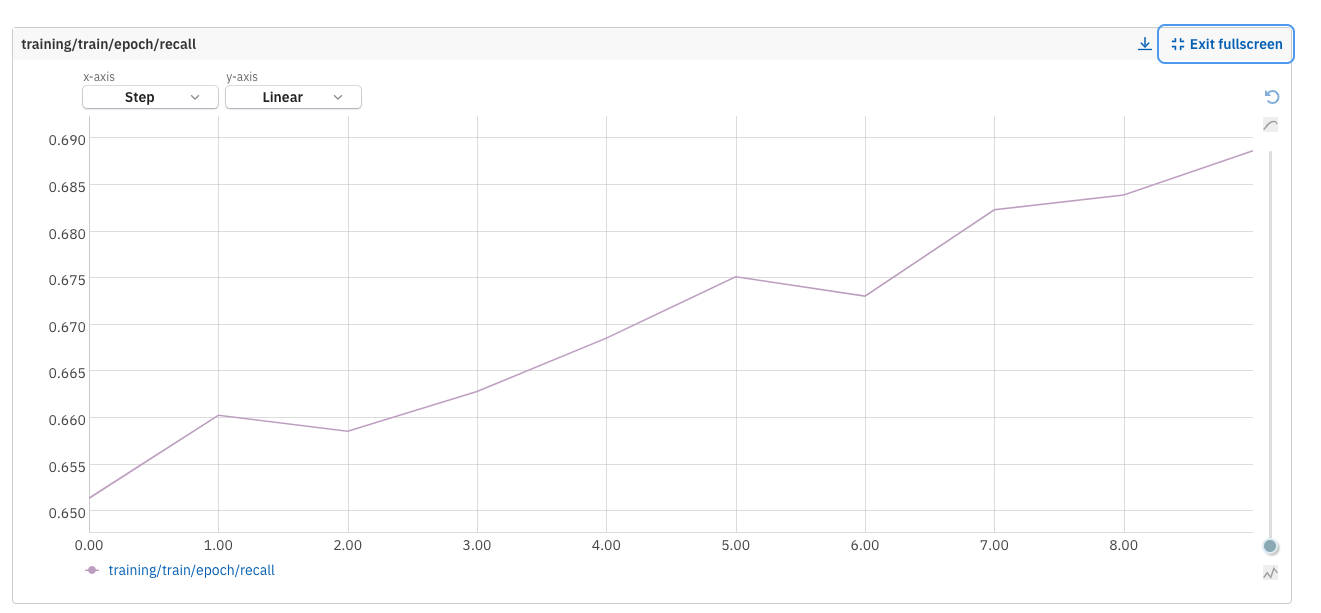

### Gradient Boosting Classifier

Se eligió utilizar Gradient Boosting Classifier para este problema principalmente porque tiene robustez frente a datos equilibrados, algo importante en este caso ya que se observa que más datos para cuando el ingreso es menor o igual a 50,000 que para cuando el ingreso es mayor a 50,000. Otra razón es debido a que es conocido por su alto rendimiento y capacidad para manejar conjuntos de datos complejos.

Debido a que hay un desequlibro de clases la métrica a utilizar para evaluar el desempeño del modelo es F1-Score. 

Para elegir los hiperparámetros con los que el modelo tiene un mejor desempeño entre grupos de hiperparametros, se hicieron los siguientes grupos y se probaron con el método de GridSearch.

In [63]:
param_grid = {
    'n_estimators': [50, 100], 
    'learning_rate': [0.1, 0.05], 
    'max_depth': [3, 4, 5]  
}

param_grid2 = {
    'n_estimators': [100, 200], 
    'learning_rate': [0.1, 0.01], 
    'max_depth': [3, 7, 5] 
}

param_grid3 = {
    'n_estimators': [100, 65], 
    'learning_rate': [0.1, 0.01],  
    'max_depth': [3, 7, 5]  
}

param_grid4 = {
    'n_estimators': [100], 
    'learning_rate': [0.1],  
    'max_depth': [5], 
    'min_samples_leaf': [4,5,6]
}

param_grid5 = {
    'n_estimators': [100], 
    'learning_rate': [0.1], 
    'max_depth': [5],  
    'min_samples_leaf': [4,5,6],
    "max_features":["log2","sqrt"]
}

In [64]:
from sklearn.datasets import load_digits
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

gbc = GradientBoostingClassifier()

scorer = make_scorer(f1_score)

grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, scoring=scorer, cv=5)


In [65]:
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_validation)

f1 = f1_score(y_validation, y_pred)
print("F1-Score :", f1)


Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Score:  0.7028778546803641
F1-Score : 0.729044834307992


In [66]:
best_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5)

Los resultados obtenidos con el método fueron los siguientes, razón por la cual se eligen los parametros n_estimators: 100, learning_rate: 0.1 y max_depth: 5 para el modelo GradientBoostingClassifier final.

| Param Grid | Parameters | Best Parameters | Accuracy |
| --- | --- | --- | --- |
| param_grid | n_estimators: [50, 100], learning_rate: [0.1, 0.05], max_depth: [3, 4, 5] | n_estimators: 100, learning_rate: 0.1, max_depth: 5 | Entrenamiento: 0.7021 , validación: 0.7290 |
| param_grid2 | n_estimators: [100, 200], learning_rate: [0.1, 0.01], max_depth: [3, 7, 5] | n_estimators: 100, learning_rate: 0.1, max_depth: 7 | 0.7094 , validación: 0.727  |
| param_grid3 | n_estimators: [100, 65], learning_rate: [0.1, 0.01], max_depth: [3, 7, 5] | n_estimators: 100, learning_rate: 0.1, max_depth: 7 | 0.7073 , validación: 0.7270  |
| param_grid4 | n_estimators: [100], learning_rate: [0.1], max_depth: [5], min_samples_leaf: [4, 5, 6] | n_estimators: 100, learning_rate: 0.1, max_depth: 7, min_samples_leaf: 5 | 0.7027 , validación: 0.7269  |
| param_grid5 | n_estimators: [100], learning_rate: [0.1], max_depth: [5], min_samples_leaf: [4, 5, 6], max_features: ["log2", "sqrt"] | n_estimators: 100, learning_rate: 0.1, max_depth: 7, min_samples_leaf: 5, max_features: "sqrt2"| 0.6820 , validación: 0.7056  |

A continuación se utiliza Neptune para visualizar los resultados del entrenamiento del modelo.

In [67]:
import neptune

run = neptune.init_run(
    project="aralimata/AdultIncomeGBC",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIzMWU1MGY3NC1iN2NiLTQzNzAtYTFhMC1lMDI5OWU0NmVhNWQifQ==",
    name="classification",
    tags=["GradientBoostingClassifier", "classification"],
)

https://app.neptune.ai/aralimata/AdultIncomeGBC/e/AD-15


In [68]:
import neptune.integrations.sklearn as npt_utils

run["cls_summary"] = npt_utils.create_classifier_summary(best_model, X_train, X_validation, y_train, y_validation)

In [69]:
run.stop()

Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 37 operations to synchronize with Neptune. Do not kill this process.
All 37 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/aralimata/AdultIncomeGBC/e/AD-15/metadata


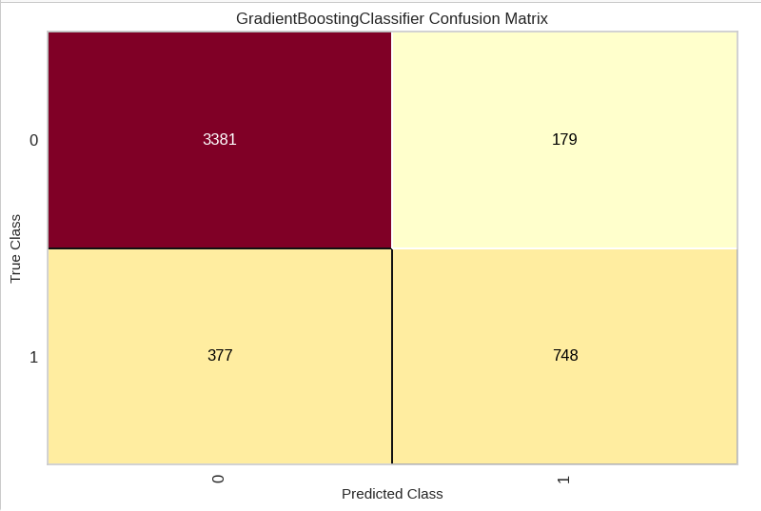

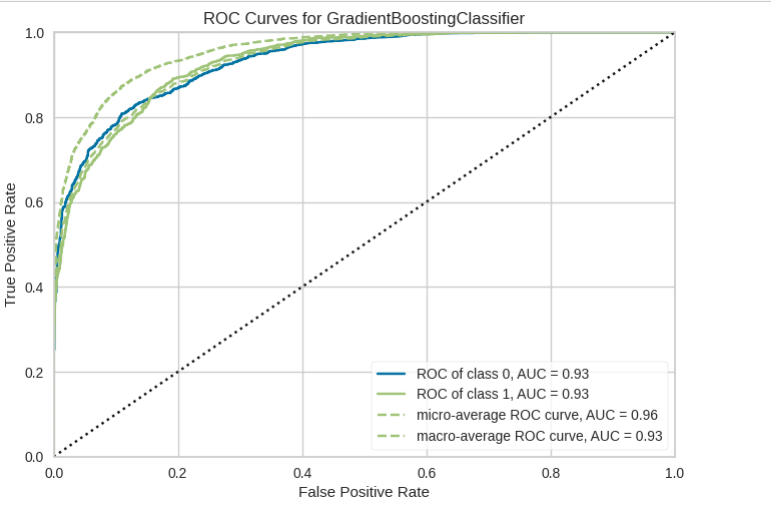

## Prueba de modelo seleccionado

A continuación se prueban los modelos seleccionados anteriormente y se meuestran los resultados.

### Red neuronal

In [70]:
y_test = test_data['income']
X_test = test_data.drop('income', axis=1)

In [71]:
results_final = model.evaluate(X_test, y_test)

f1_final = 2 * (results_final[3] * results_final[4]) / (results_final[3] + results_final[4])

print("F1-score:", f1_final)

306/306 [==============================] - 1s 2ms/step - loss: 0.3441 - accuracy: 0.8497 - precision: 0.7275 - recall: 0.5992 - auc: 0.8971 - false_positives: 527.0000 - false_negatives: 941.0000
F1-score: 0.7185112888526666


Se observa que la red neuronal tiene un desempeño menor desempeño que en los datos de validación y de entrenamiento. Lo cual podría indicar algo de overfitting.

### Gradient Boosting Classifier

In [72]:
y_pred = best_model.predict(X_test)

f1 = f1_score(y_test, y_pred)
print("F1-Score :", f1)

F1-Score : 0.6869976359338062


Bajó un poco el desempeño en comparación al desempeño con los datos de validación y de entrenamiento, sin embargo sigue siendo muy similar, por lo cual se concluye que no hay overfitting y puede generalizar.